In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/astrologics/models/dev/synthetic_random_diff/'
model = le.LogicEnsemble(model_path, project_name = 'synthetic_random_diff')
model.create_simulation()

Simulation object created


# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [3]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 1000/1000 [00:14<00:00, 68.77it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:00<00:00, 3205.13it/s]
/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


Attractors calculation completed


bn_411  bn_361  bn_60  bn_109  bn_975  bn_265  bn_784  \
01001111000100100110       1       1      1       1       1       1       1   
10110000110000000001       1       1      1       1       1       1       1   
00111011000000100000       1       1      1       1       1       1       1   

                      bn_595  bn_34  bn_624  bn_520  bn_980  bn_529  bn_461  \
01001111000100100110       1      1       1       1       1       1       1   
10110000110000000001       1      1       1       1       1       1       1   
00111011000000100000       1      1       1       1       1       1       1   

                      bn_300  bn_985  bn_818  bn_707  bn_421  bn_631  bn_399  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_152  bn_708  bn_380  bn_108  bn_393  bn_129  bn_314  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_918  bn_54  bn_179  bn_722  bn_554  bn_213  bn_192  \
01001111000100100110       1      1       1       1       1       1       1   
10110000110000000001       1      1       1       1       1       1       1   
00111011000000100000       1      1       1       1       1       1       1   

                      bn_958  bn_676  bn_503  bn_119  bn_521  bn_460  bn_117  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_934  bn_391  bn_823  bn_872  bn_717  bn_576  bn_811  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_833  bn_571  bn_454  bn_839  bn_339  bn_161  bn_405  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_301  bn_928  bn_228  bn_894  bn_432  bn_667  bn_85  \
01001111000100100110       1       1       1       1       1       1      1   
10110000110000000001       1       1       1       1       1       1      1   
00111011000000100000       1       1       1       1       1       1      1   

                      bn_476  bn_410  bn_120  bn_773  bn_887  bn_856  bn_158  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_546  bn_323  bn_962  bn_51  bn_840  bn_542  bn_885  \
01001111000100100110       1       1       1      1       1       1       1   
10110000110000000001       1       1       1      1       1       1       1   
00111011000000100000       1       1       1      1       1       1       1   

                      bn_330  bn_849  bn_502  bn_900  bn_892  bn_555  bn_217  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1       1       1       1       1       1       1   
00111011000000100000       1       1       1       1       1       1       1   

                      bn_316  bn_653  bn_589  bn_701  bn_560  bn_553  bn_508  \
01001111000100100110       1       1       1       1       1       1       1   
10110000110000000001       1  

This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:623: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


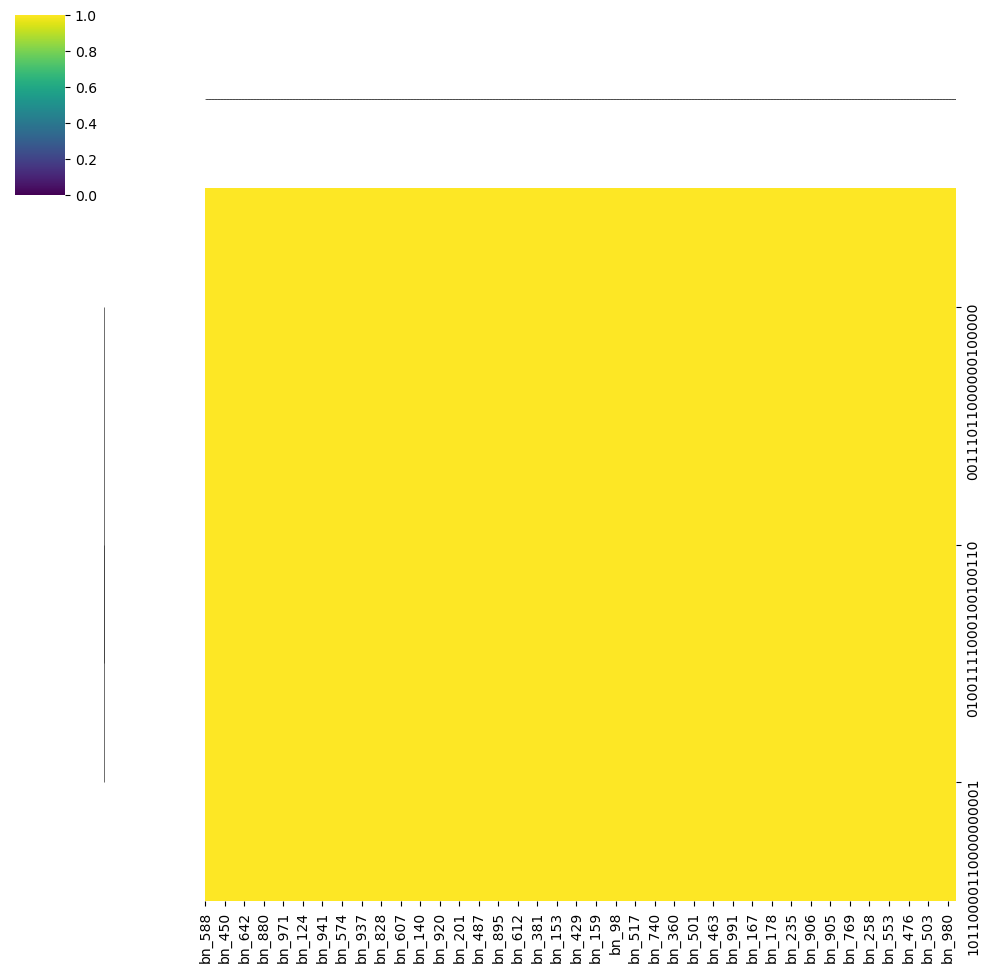

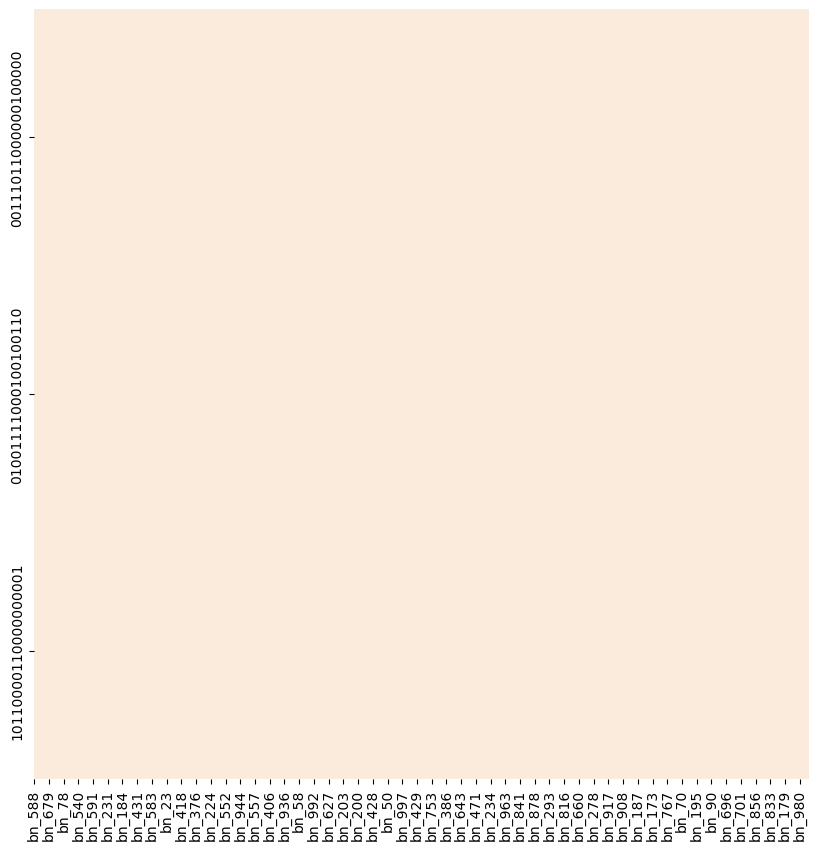

In [4]:
# Create the clustermap
clustermap = sns.clustermap(model.attractor.attractors_df, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.attractor.attractors_df.iloc[row_order, col_order]

# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(reordered_df, 
            #cmap='viridis', 
            vmax=1, vmin=0, cbar=False)
#plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/toy_reprogramming_AttractorHeatmap.pdf')
plt.show()
plt.close()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [17]:
test = pd.read_csv(model_path + '/bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))
test_dict

{'x0': 0.5,
 'x1': 0.5,
 'x10': 0.5,
 'x11': 0.5,
 'x12': 0.5,
 'x13': 0.5,
 'x14': 0.5,
 'x15': 0.5,
 'x17': 0.5,
 'x2': 0.5,
 'x20': 0.5,
 'x21': 0.5,
 'x23': 0.5,
 'x24': 0.5,
 'x26': 0.5,
 'x3': 0.5,
 'x4': 0.5,
 'x6': 0.5,
 'x8': 0.5,
 'x9': 0.5}

In [19]:
model.simulation.update_parameters(max_time = 10, sample_count = 3000)

model.simulation.run_simulation(initial_state=test_dict)

Start simulation


100%|██████████| 1000/1000 [08:15<00:00,  2.02it/s]


Simulation completed


Trajectory object created


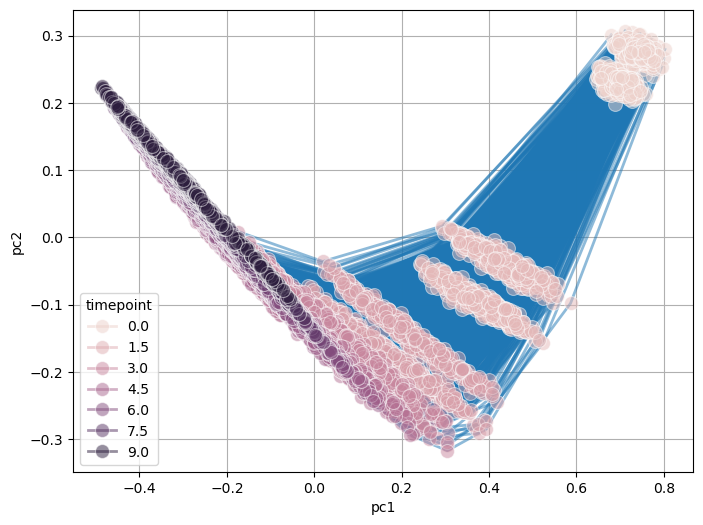

In [20]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [21]:
import numpy as np
# Setup the 
pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories

simulation_df = model.simulation.simulation_df
simulation_df.model_id = simulation_df.model_id.astype('category')
node_list = simulation_df.columns.drop(['timepoint','model_id'])

model_original_all = {}
for i in model_name:
    model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
    model_original_all[i] = np.array(model_original)
pca_all_trajectory = np.array(list(model_original_all.values()))

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


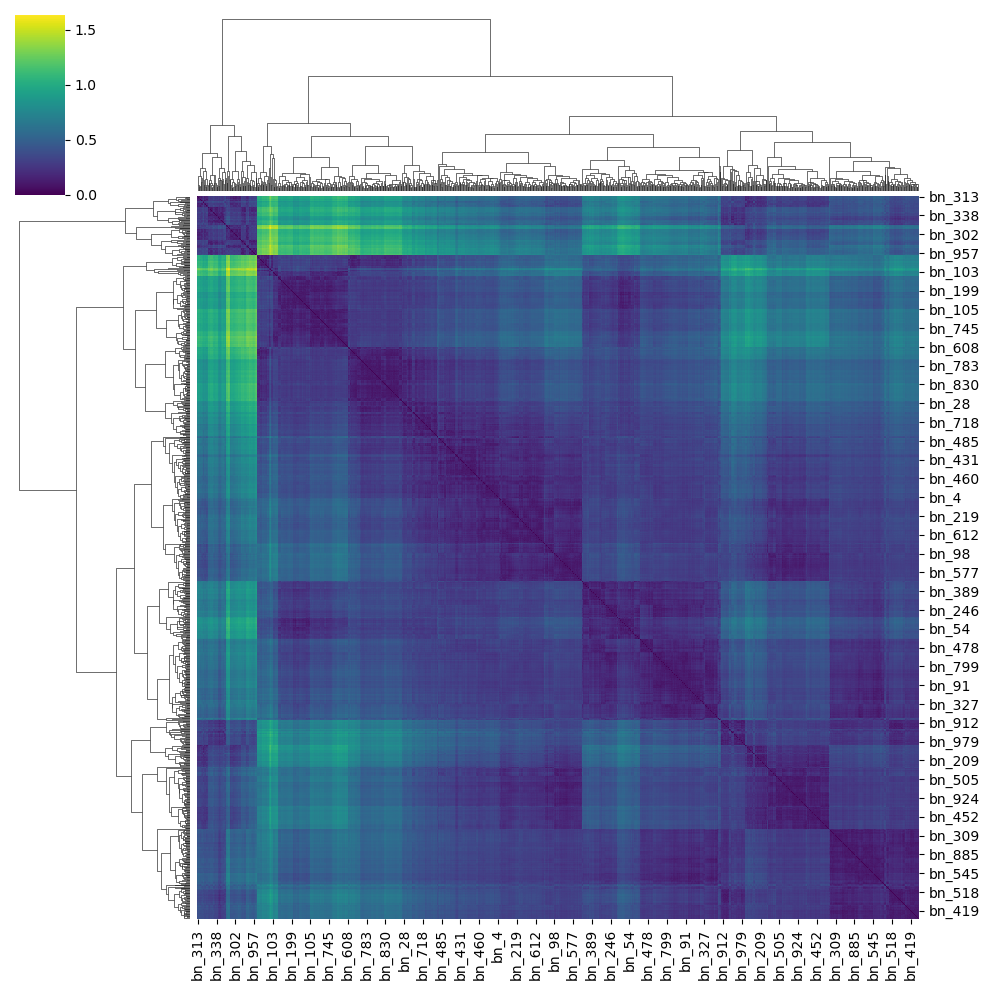

In [22]:
from tslearn.metrics import dtw

# Initialize an empty distance matrix
num_trajectories = len(pca_all_trajectory)
distance_matrix = np.zeros((num_trajectories, num_trajectories))

# Calculate DTW distance for each pair of trajectories
for i in range(num_trajectories):
    for j in range(num_trajectories):
        distance_matrix[i, j] = dtw(pca_all_trajectory[i], pca_all_trajectory[j])

# Display the distance matrix
distance_matrix = pd.DataFrame(distance_matrix, index=model_name, columns=model_name)
sns.clustermap(distance_matrix, cmap='viridis', figsize=(10,10))

In [53]:
# Visualize clusters with MDS
from sklearn.manifold import MDS

# Visualize clusters with MDS
#distance_matrix = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix)
coords_vis = pd.DataFrame(coords, columns = ['x', 'y'], index = distance_matrix.index)

/tmp/ipykernel_139089/1284683479.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


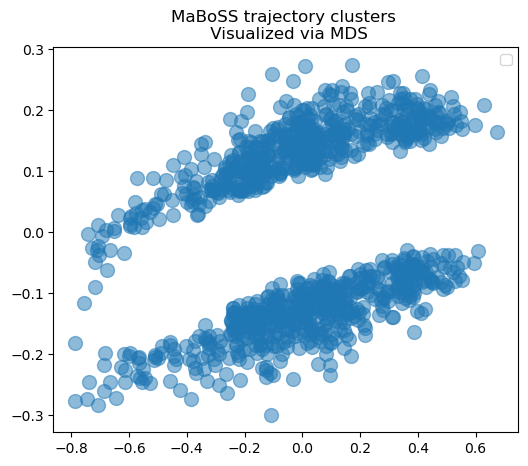

In [25]:
plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('MaBoSS trajectory clusters \n Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/srd_trajMDS_v2.pdf')

plt.show()

plt.close()

Succession diagram object created
Calculating Succession Diagrams


100%|██████████| 1000/1000 [04:14<00:00,  3.93it/s]


Succession Diagrams calculated


100%|██████████| 1000/1000 [00:05<00:00, 178.51it/s]


Creating SD networks


100%|██████████| 1000/1000 [00:04<00:00, 218.56it/s]


SD networks created


  0%|          | 0/1000 [00:00<?, ?it/s]/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/netrd/utilities/graph.py:74: RuntimeWarning: Coercing directed graph to undirected.
  warnings.warn("Coercing directed graph to undirected.", RuntimeWarning)
100%|██████████| 1000/1000 [16:35<00:00,  1.00it/s]
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


SD networks distance calculated


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


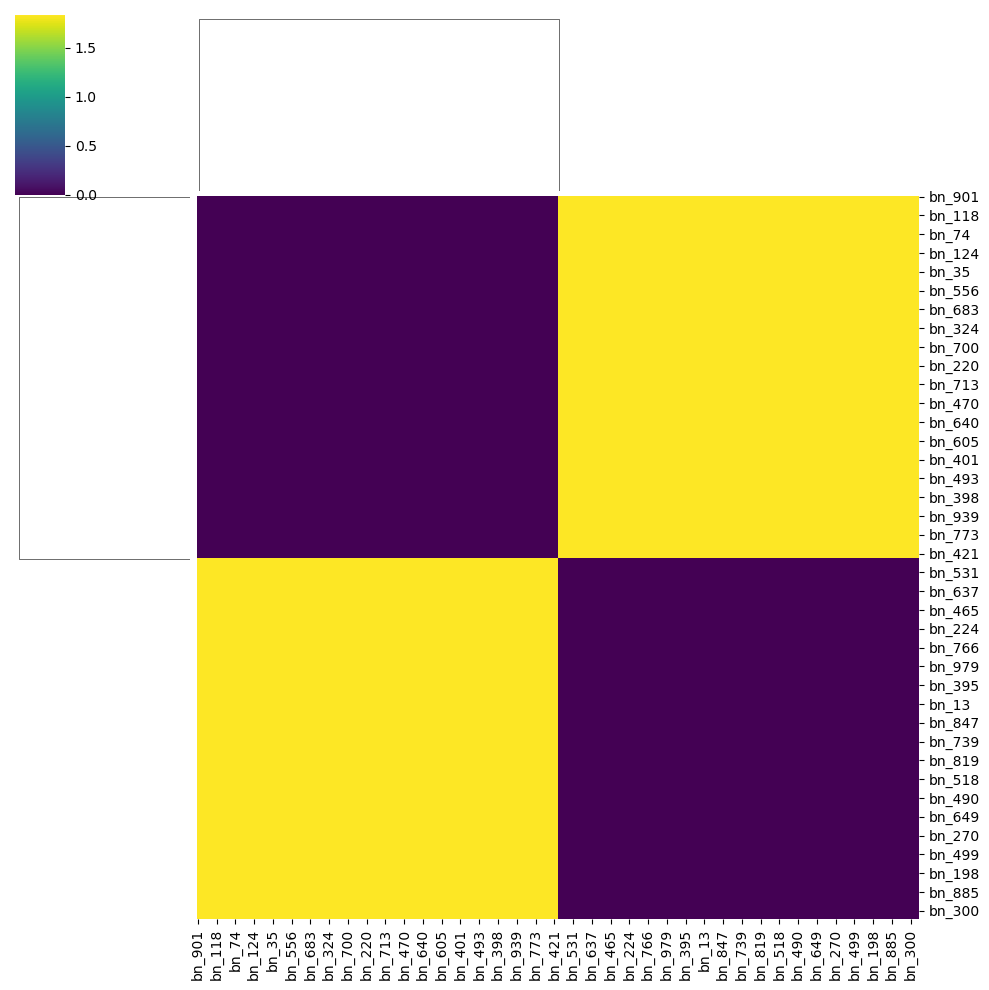

In [24]:
model.create_succession_diagram()
model.succession_diagram.calculate_succession_diagram()
model.succession_diagram.calculate_sd_states()
model.succession_diagram.create_sd_networks()
model.succession_diagram.calculate_sdnet_distance()
sns.clustermap(model.succession_diagram.distance_matrix, cmap='viridis')

In [ ]:
model.succession_diagram.cluster_sdnet(n_cluster = 2)

/home/spankaew/Git/astrologics/astrologics/succession_diagram.py:203: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


SD networks clustered


In [57]:
model_list = list(model.succession_diagram.models_net.keys())
sd_cluster = model.succession_diagram.clusters
sd_cluster = pd.DataFrame(sd_cluster, columns = ['sd_cluster'], index = model_list)

In [60]:
coords_vis = pd.concat([coords_vis, sd_cluster],axis = 1)

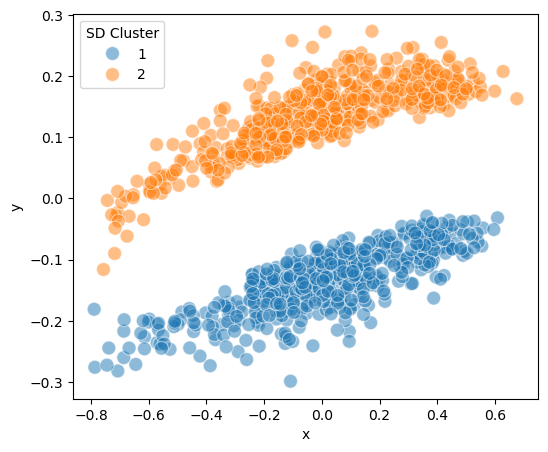

In [66]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=coords_vis, x='x', y='y', hue='sd_cluster', palette='tab10', alpha=0.5, s=100)
plt.legend(title='SD Cluster')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/srd_trajMDS_clustbySD.pdf')

plt.show()
plt.close()


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


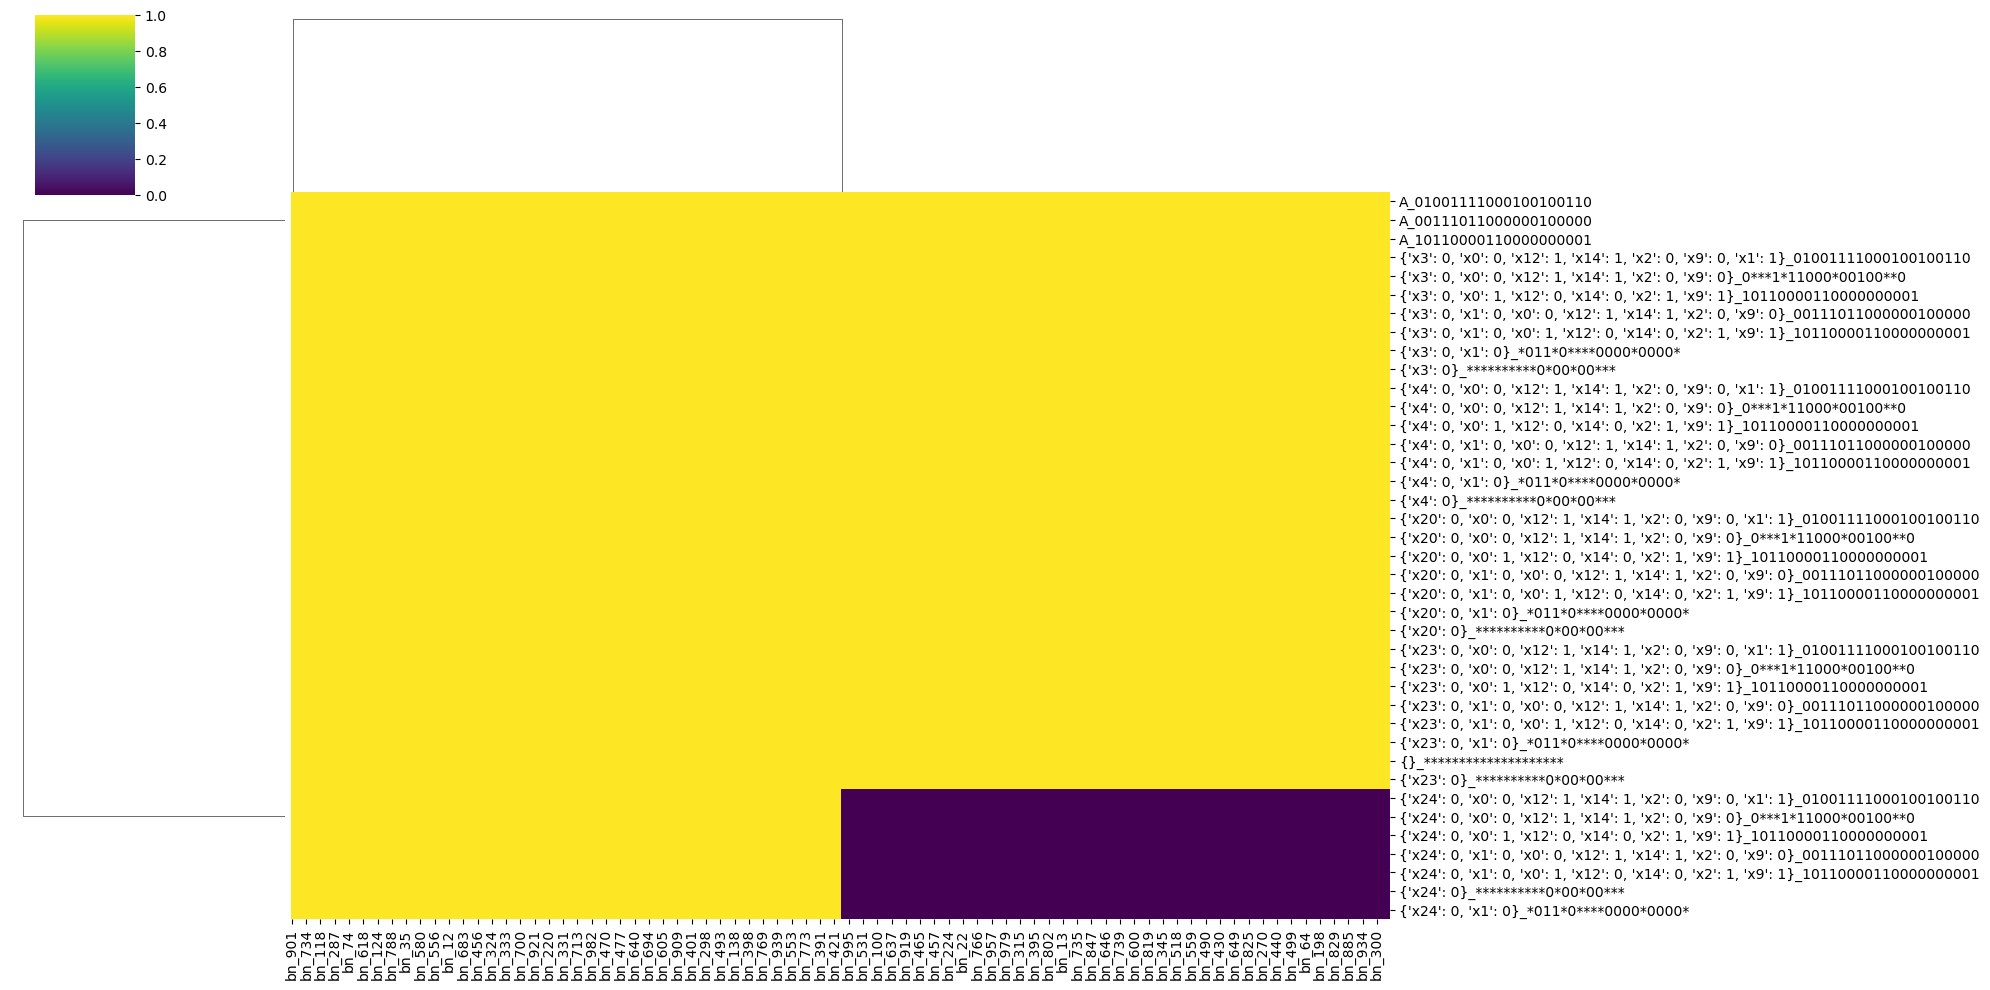

In [30]:
sns.clustermap(model.succession_diagram.states_bin, figsize=(20,10), cmap='viridis')

/tmp/ipykernel_139089/2544703876.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


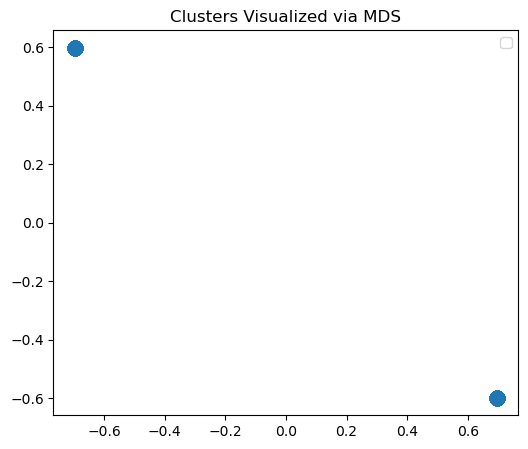

In [26]:
# Visualize clusters with MDS
distance_matrix_2 = model.succession_diagram.distance_matrix
mds = MDS(dissimilarity='precomputed', random_state=12345)
coords = mds.fit_transform(distance_matrix_2)

plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5, s = 100)
plt.legend()
plt.title('Clusters Visualized via MDS')
plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/srd_sdMDS.pdf')

plt.show()

plt.close()

In [27]:
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape ,dtype = bool), k=1)).stack().reset_index()
distances_1['combined'] = distances_1['level_0'] + "_" + distances_1['level_1']
distances_1.set_index('combined', inplace=True)
distances_1.drop(columns=['level_0', 'level_1'], inplace=True)
distances_1.columns = ['traj_distance']

In [28]:
distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape ,dtype = bool), k=1)).stack().reset_index()
distances_2['combined'] = distances_2['level_0'] + "_" + distances_2['level_1']
distances_2.set_index('combined', inplace=True)
distances_2.drop(columns=['level_0', 'level_1'], inplace=True)
distances_2.columns = ['sd_distance']

Correlation between the two distance matrices: 0.20851765200917585
P-value: 0.0


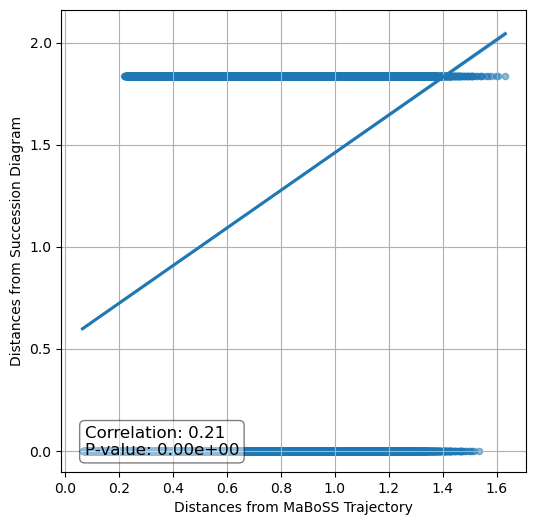

In [29]:
from scipy.stats import pearsonr

# Extract the upper triangular parts of the distance matrices (excluding the diagonal)
distance_matrix = distance_matrix.loc[model_name, model_name]
distances_1 = distance_matrix.where(np.triu(np.ones(distance_matrix.shape, dtype='bool'), k=1)).stack()

distance_matrix_2 = distance_matrix_2.loc[model_name, model_name]
distances_2 = distance_matrix_2.where(np.triu(np.ones(distance_matrix_2.shape, dtype='bool'), k=1)).stack()

# Compute the correlation and p-value
correlation, p_value = pearsonr(distances_1.values, distances_2.values)

# Print the correlation and p-value
print(f"Correlation between the two distance matrices: {correlation}")
print(f"P-value: {p_value}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(6, 6))
sns.regplot(x=distances_1.values, y=distances_2.values, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel("Distances from MaBoSS Trajectory")
plt.ylabel("Distances from Succession Diagram")
plt.grid(True)

# Add a box label with correlation and p-value
plt.text(
    0.05, 0.1, 
    f"Correlation: {correlation:.2f}\nP-value: {p_value:.2e}", 
    transform=plt.gca().transAxes, 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.5)
)

plt.savefig('/home/spankaew/Git/astrologics/figures/model_clusters/srd_distCorr_v2.pdf')

plt.show()

plt.close()

# Create logic function matrix
In this part of the script, we load models' logic function into a matrix. This matrix can then be transformed into a Disjunctive Normal Form (DNF) which allow us to identify clause of components that can activate each node. 

In [67]:
model.create_logic()
model.logic.model_logic

Loading models logics


100%|██████████| 1000/1000 [00:02<00:00, 377.28it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:01<00:00, 999.64it/s]


Logic object created


bn_411  \
x0                                                (x2)   
x1   (!x0 & x1) | (x1 & x14 & x3) | (x1 & x4) | (x1...   
x10                                              (x11)   
x11                                              (!x8)   
x12                                      (x23) | (!x9)   
x13                                               (x1)   
x14                                              (x12)   
x15                                              (x14)   
x17                                               (x0)   
x2                                (x3) | (!x14 & !x20)   
x20                                                (0)   
x21                                               (x6)   
x23                                                (0)   
x24                                               (x3)   
x26                                             (!x17)   
x3                                                 (0)   
x4                                                 (0)   
x6                                              (!x11)   
x8                                                (x1)   
x9                                                (x0)   

                                                bn_361  \
x0                                                (x2)   
x1   (!x0 & x1 & x3) | (!x0 & x4) | (x1 & x14) | (x...   
x10                                              (x11)   
x11                                              (!x8)   
x12                                      (x23) | (!x9)   
x13                                               (x1)   
x14                                              (x12)   
x15                                              (x14)   
x17                                               (x0)   
x2                                (x3) | (!x14 & !x20)   
x20                                                (0)   
x21                                               (x6)   
x23                                                (0)   
x24                                               (x3)   
x26                                             (!x17)   
x3                                                 (0)   
x4                                                 (0)   
x6                                              (!x11)   
x8                                                (x1)   
x9                                                (x0)   

                              bn_60  \
x0                             (x2)   
x1   (x4) | (!x0 & x3) | (x1 & x14)   
x10                           (x11)   
x11                           (!x8)   
x12                   (x23) | (!x9)   
x13                            (x1)   
x14                           (x12)   
x15                           (x14)   
x17                            (x0)   
x2             (x3) | (!x14 & !x20)   
x20                             (0)   
x21                            (x6)   
x23                             (0)   
x24                             (0)   
x26                          (!x17)   
x3                              (0)   
x4                              (0)   
x6                           (!x11)   
x8                             (x1)   
x9                             (x0)   

                                              bn_109  \
x0                                              (x2)   
x1   (!x0 & x1 & x14) | (!x0 & x14 & x4) | (x1 & x3)   
x10                                            (x11)   
x11                                            (!x8)   
x12                                    (x23) | (!x9)   
x13                                             (x1)   
x14                                            (x12)   
x15                                            (x14)   
x17                                             (x0)   
x2                              (x3) | (!x14 & !x20)   
x20                                              (0)   
x21                                             (x6)   
x23                                              (0)   
x24   

Flatten models logic clauses


100%|██████████| 1000/1000 [00:00<00:00, 2579522.76it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:00<00:00, 1238.60it/s]
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Flattend logic clause created


FileNotFoundError: [Errno 2] No such file or directory: '/home/spankaew/Git/BooleanBenchmark/figures/toy_reprogramming_Logic.pdf'

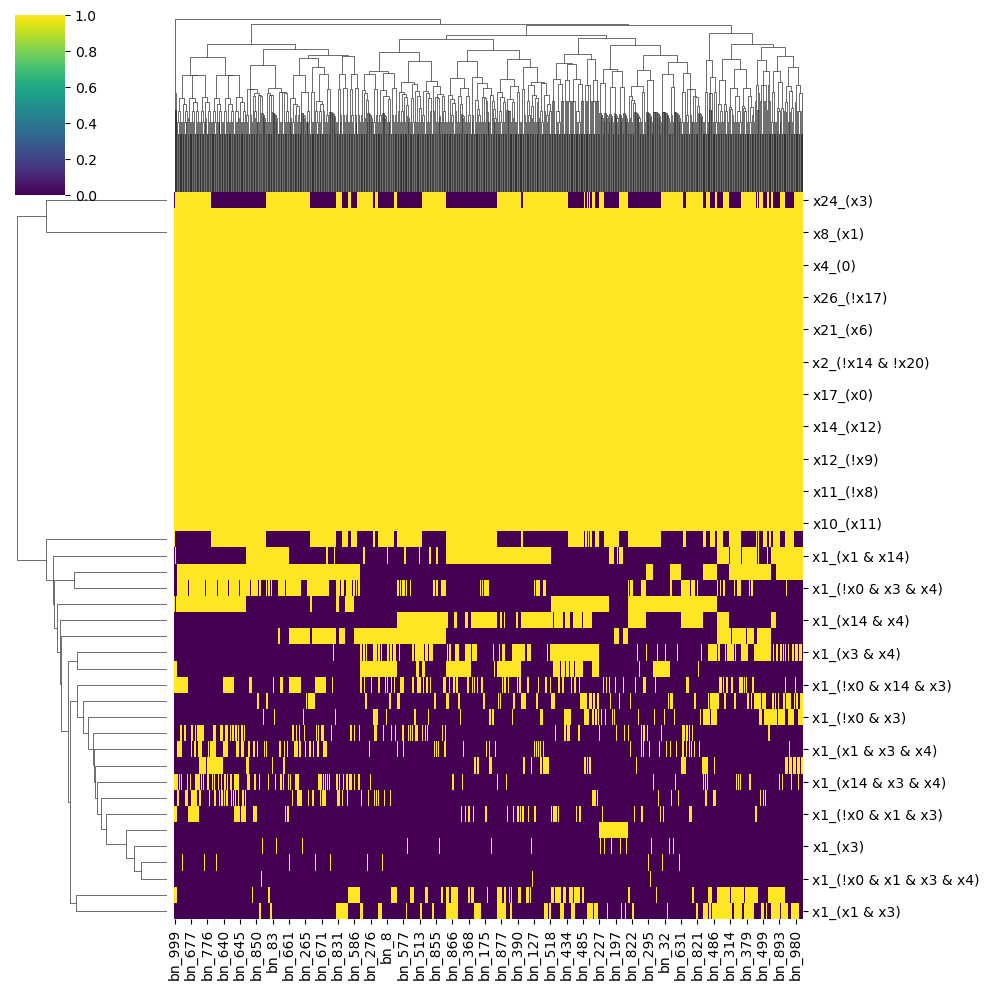

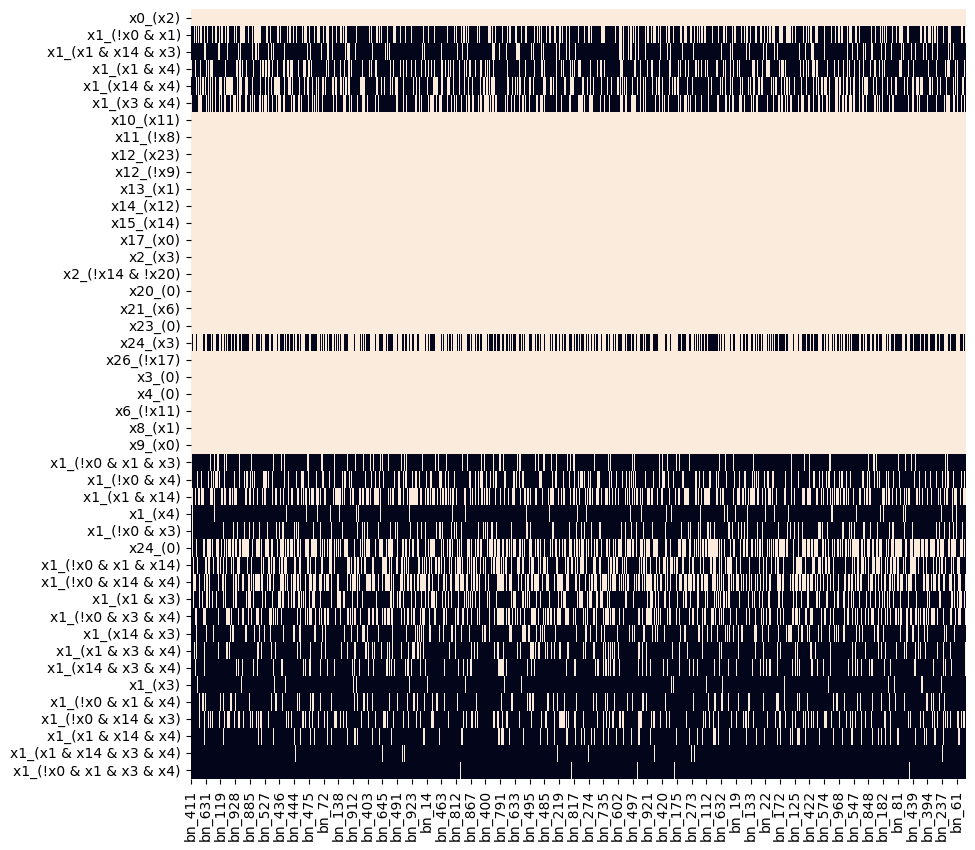

In [ ]:
model.logic.create_flattend_logic_clause()
# Create the clustermap
clustermap = sns.clustermap(model.logic.logic_clause_flattend, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.logic.logic_clause_flattend.iloc[row_order, col_order]
# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(model.logic.logic_clause_flattend, vmax=1, vmin=0, cbar=False)
plt.savefig('/home/spankaew/Git/astrologics/figures/toy_reprogramming_Logic.pdf')
plt.show()
plt.close()

PCA calculated


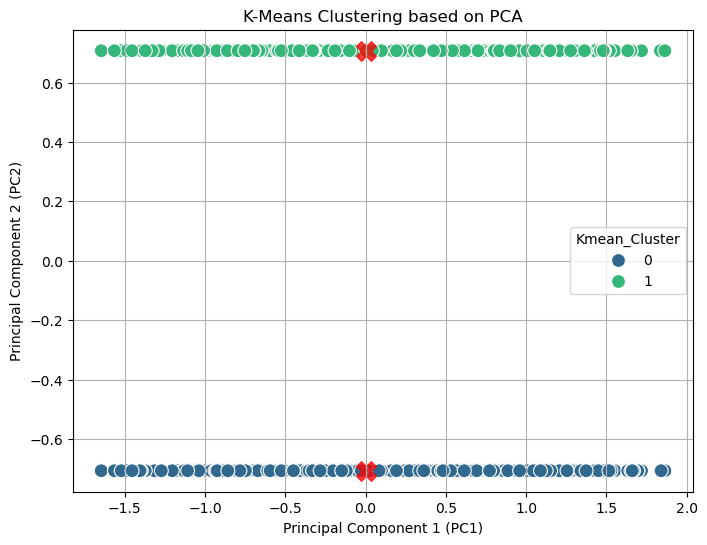

In [71]:
model.logic.calculate_logic_pca()
model.logic.calculate_kmean_cluster(num_cluster = 2)

In [73]:
from sklearn.preprocessing import OrdinalEncoder
model_cluster = pd.Series(model.logic.pca_df.Kmean_Cluster)
model_logic = model.logic.model_logic

var_logic_clust = pd.DataFrame()
for i in list(model_cluster.unique()):
    model_logic_sub = model_logic.transpose().loc[list(model_cluster.index[model_cluster == i])]
    #model_logic_sub = model_logic_sub.drop(['logic_cluster'], axis = 1)
    var_logic_length = []
    for j in model_logic_sub.columns:
        num_logic = model_logic_sub[j].value_counts().size
        var_logic_length.append(num_logic)
    var_logic_length = pd.DataFrame(var_logic_length, columns = ['logic_length'], index = model_logic_sub.columns)
    var_logic_clust = pd.concat([var_logic_clust, var_logic_length], axis = 1, ignore_index = False)
var_logic_clust.columns = list(model_cluster.unique())

model_logic_t= model_logic.transpose()

# Ordinal encoding
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(model_logic_t)
encoded_df = pd.DataFrame(encoded_data, columns=model_logic_t.columns)

sort_index = encoded_df.max().sort_values().index

var_logic_clust= var_logic_clust.loc[sort_index] 

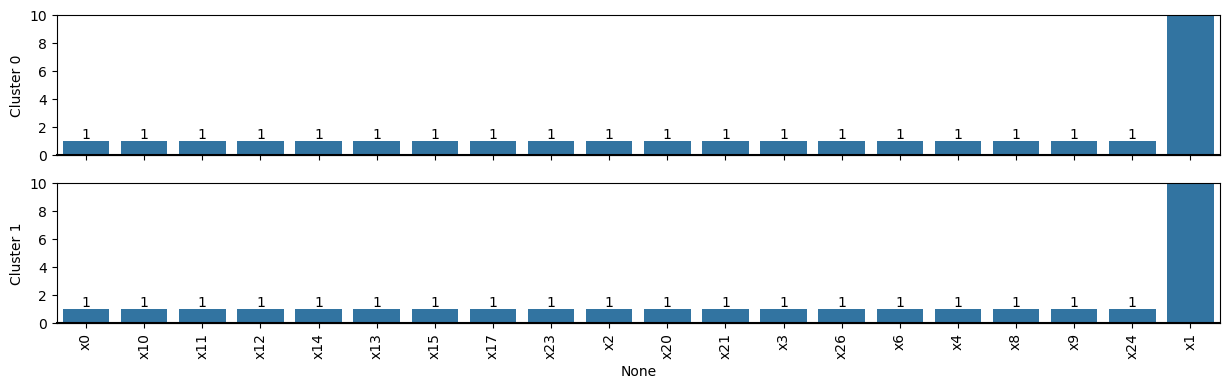

In [74]:
fig, axes = plt.subplots(2, 1, figsize=(15, 4), sharex=True)
plt.ylim(0, 65)

for i in range(2):
    sns.barplot(x=var_logic_clust.index, y=var_logic_clust[i], ax=axes[i])
    axes[i].axhline(0, color="k", clip_on=False)
    axes[i].set_ylabel(f"Cluster {i}")
    axes[i].bar_label(axes[i].containers[0], fontsize=10)
    axes[i].set_ylim(0, 10)

plt.xticks(rotation=90)
plt.show()

In [ ]:
model_list = list(model.succession_diagram.models_net.keys())
sd_cluster = model.succession_diagram.clusters


sd_cluster
bn_411           2
bn_361           2
bn_60            1
bn_109           2
bn_975           2
...            ...
bn_177           1
bn_169           1
bn_170           2
bn_901           1
bn_588           2

[1000 rows x 1 columns]

In [80]:
sd_cluster_dict = dict(zip(model_list, sd_cluster))
sd_cluster_dict

{'bn_411': np.int32(2),
 'bn_361': np.int32(2),
 'bn_60': np.int32(1),
 'bn_109': np.int32(2),
 'bn_975': np.int32(2),
 'bn_265': np.int32(2),
 'bn_784': np.int32(2),
 'bn_595': np.int32(1),
 'bn_34': np.int32(2),
 'bn_624': np.int32(1),
 'bn_520': np.int32(2),
 'bn_980': np.int32(2),
 'bn_529': np.int32(2),
 'bn_461': np.int32(2),
 'bn_300': np.int32(2),
 'bn_985': np.int32(2),
 'bn_818': np.int32(1),
 'bn_707': np.int32(1),
 'bn_421': np.int32(1),
 'bn_631': np.int32(2),
 'bn_399': np.int32(2),
 'bn_152': np.int32(1),
 'bn_708': np.int32(2),
 'bn_380': np.int32(1),
 'bn_108': np.int32(1),
 'bn_393': np.int32(1),
 'bn_129': np.int32(2),
 'bn_314': np.int32(1),
 'bn_918': np.int32(1),
 'bn_54': np.int32(2),
 'bn_179': np.int32(2),
 'bn_722': np.int32(2),
 'bn_554': np.int32(2),
 'bn_213': np.int32(1),
 'bn_192': np.int32(1),
 'bn_958': np.int32(1),
 'bn_676': np.int32(1),
 'bn_503': np.int32(2),
 'bn_119': np.int32(2),
 'bn_521': np.int32(1),
 'bn_460': np.int32(1),
 'bn_117': np.int32

In [81]:
from scipy.stats import chi2_contingency

test = model.logic.logic_clause_flattend
test = test.transpose()
test['group'] = test.index.map(sd_cluster_dict)
# Assuming 'df' is a DataFrame with samples as rows and features as columns,
# and 'group' is a column indicating group membership.

# Step 1: Identify constant features.
constant_features = [col for col in test.columns if col != 'group' and test[col].nunique() == 1]

# Step 2 & 3: For non-constant features, perform chi-square test.
marker_features = []
varied_features = []

for col in test.columns:
    if col == 'group' or col in constant_features:
        continue
    contingency_table = pd.crosstab(test[col], test['group'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.001:  # Adjust threshold as needed after multiple testing correction.
        marker_features.append(col)
    else:
        varied_features.append(col)

print("Constant features:", constant_features)
print("Varied but not markers:", varied_features)
print("Key marker features:", marker_features)

Constant features: ['x0_(x2)', 'x10_(x11)', 'x11_(!x8)', 'x12_(x23)', 'x12_(!x9)', 'x13_(x1)', 'x14_(x12)', 'x15_(x14)', 'x17_(x0)', 'x2_(x3)', 'x2_(!x14 & !x20)', 'x20_(0)', 'x21_(x6)', 'x23_(0)', 'x26_(!x17)', 'x3_(0)', 'x4_(0)', 'x6_(!x11)', 'x8_(x1)', 'x9_(x0)']
Varied but not markers: ['x1_(!x0 & x1)', 'x1_(x1 & x14 & x3)', 'x1_(x1 & x4)', 'x1_(x14 & x4)', 'x1_(x3 & x4)', 'x1_(!x0 & x1 & x3)', 'x1_(!x0 & x4)', 'x1_(x1 & x14)', 'x1_(x4)', 'x1_(!x0 & x3)', 'x1_(!x0 & x1 & x14)', 'x1_(!x0 & x14 & x4)', 'x1_(x1 & x3)', 'x1_(!x0 & x3 & x4)', 'x1_(x14 & x3)', 'x1_(x1 & x3 & x4)', 'x1_(x14 & x3 & x4)', 'x1_(x3)', 'x1_(!x0 & x1 & x4)', 'x1_(!x0 & x14 & x3)', 'x1_(x1 & x14 & x4)', 'x1_(x1 & x14 & x3 & x4)', 'x1_(!x0 & x1 & x3 & x4)']
Key marker features: ['x24_(x3)', 'x24_(0)']


{'bn_411': np.int32(2),
 'bn_361': np.int32(2),
 'bn_60': np.int32(1),
 'bn_109': np.int32(2),
 'bn_975': np.int32(2),
 'bn_265': np.int32(2),
 'bn_784': np.int32(2),
 'bn_595': np.int32(1),
 'bn_34': np.int32(2),
 'bn_624': np.int32(1),
 'bn_520': np.int32(2),
 'bn_980': np.int32(2),
 'bn_529': np.int32(2),
 'bn_461': np.int32(2),
 'bn_300': np.int32(2),
 'bn_985': np.int32(2),
 'bn_818': np.int32(1),
 'bn_707': np.int32(1),
 'bn_421': np.int32(1),
 'bn_631': np.int32(2),
 'bn_399': np.int32(2),
 'bn_152': np.int32(1),
 'bn_708': np.int32(2),
 'bn_380': np.int32(1),
 'bn_108': np.int32(1),
 'bn_393': np.int32(1),
 'bn_129': np.int32(2),
 'bn_314': np.int32(1),
 'bn_918': np.int32(1),
 'bn_54': np.int32(2),
 'bn_179': np.int32(2),
 'bn_722': np.int32(2),
 'bn_554': np.int32(2),
 'bn_213': np.int32(1),
 'bn_192': np.int32(1),
 'bn_958': np.int32(1),
 'bn_676': np.int32(1),
 'bn_503': np.int32(2),
 'bn_119': np.int32(2),
 'bn_521': np.int32(1),
 'bn_460': np.int32(1),
 'bn_117': np.int32

In [87]:
model_cluster = pd.Series(sd_cluster_dict)
test = model.logic.logic_clause_flattend
result_df = pd.DataFrame()

for cluster in sd_cluster_dict.values():
    cluster_id = [key for key, value in sd_cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean
result_df

Cluster_2  Cluster_1
x0_(x2)                      1.000      1.000
x1_(!x0 & x1)                0.328      0.328
x1_(x1 & x14 & x3)           0.142      0.142
x1_(x1 & x4)                 0.244      0.244
x1_(x14 & x4)                0.330      0.330
x1_(x3 & x4)                 0.318      0.318
x10_(x11)                    1.000      1.000
x11_(!x8)                    1.000      1.000
x12_(x23)                    1.000      1.000
x12_(!x9)                    1.000      1.000
x13_(x1)                     1.000      1.000
x14_(x12)                    1.000      1.000
x15_(x14)                    1.000      1.000
x17_(x0)                     1.000      1.000
x2_(x3)                      1.000      1.000
x2_(!x14 & !x20)             1.000      1.000
x20_(0)                      1.000      1.000
x21_(x6)                     1.000      1.000
x23_(0)                      1.000      1.000
x24_(x3)                     1.000      0.000
x26_(!x17)                   1.000      1.000
x3_(0)                       1.000      1.000
x4_(0)                       1.000      1.000
x6_(!x11)                    1.000      1.000
x8_(x1)                      1.000      1.000
x9_(x0)                      1.000      1.000
x1_(!x0 & x1 & x3)           0.108      0.108
x1_(!x0 & x4)                0.234      0.234
x1_(x1 & x14)                0.388      0.388
x1_(x4)                      0.046      0.046
x1_(!x0 & x3)                0.146      0.146
x24_(0)                      0.000      1.000
x1_(!x0 & x1 & x14)          0.368      0.368
x1_(!x0 & x14 & x4)          0.452      0.452
x1_(x1 & x3)                 0.260      0.260
x1_(!x0 & x3 & x4)           0.338      0.338
x1_(x14 & x3)                0.174      0.174
x1_(x1 & x3 & x4)            0.142      0.142
x1_(x14 & x3 & x4)           0.136      0.136
x1_(x3)                      0.026      0.026
x1_(!x0 & x1 & x4)           0.128      0.128
x1_(!x0 & x14 & x3)          0.218      0.218
x1_(x1 & x14 & x4)           0.118      0.118
x1_(x1 & x14 & x3 & x4)      0.016      0.016
x1_(!x0 & x1 & x3 & x4)      0.008      0.008

In [89]:
result_long_df

index    Cluster  Value
0                   x0_(x2)  Cluster_2  1.000
1                 x10_(x11)  Cluster_2  1.000
2                 x11_(!x8)  Cluster_2  1.000
3                 x12_(x23)  Cluster_2  1.000
4                 x12_(!x9)  Cluster_2  1.000
..                      ...        ...    ...
85       x1_(x1 & x14 & x4)  Cluster_1  0.118
86  x1_(x1 & x14 & x3 & x4)  Cluster_1  0.016
87  x1_(!x0 & x1 & x3 & x4)  Cluster_1  0.008
88                 x24_(x3)  Cluster_1  0.000
89                  x24_(0)  Cluster_1  1.000

[90 rows x 3 columns]

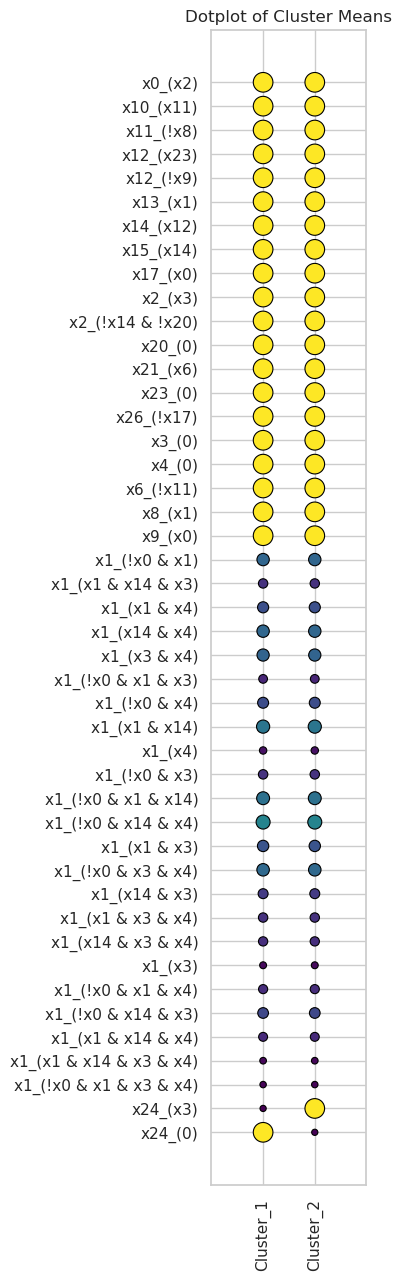

In [93]:
model_cluster = pd.Series(sd_cluster_dict)
test = model.logic.logic_clause_flattend
result_df = pd.DataFrame()

for cluster in sd_cluster_dict.values():
    cluster_id = [key for key, value in sd_cluster_dict.items() if value == cluster]
    cluster_mtx = test.loc[:, test.columns.isin(cluster_id)]
    cluster_mean = cluster_mtx.mean(axis=1)
    result_df[f'Cluster_{cluster}'] = cluster_mean

# Convert the result_df to a long format for easier plotting with seaborn
result_df = result_df.loc[constant_features + varied_features + marker_features,:]
result_long_df = result_df.reset_index().melt(id_vars='index', var_name='Cluster', value_name='Value')

# Create the dot plot
plt.figure(figsize=(2, 15))
sns.set_theme(style="whitegrid")
dotplot = sns.scatterplot(data=result_long_df, 
                          x=pd.Categorical(result_long_df['Cluster'], categories=['Cluster_1', 'Cluster_2'], ordered=True), 
                          y='index', 
                          size='Value', hue='Value', 
                          palette='viridis', sizes=(20, 200), legend=None,
                          edgecolor='black', linewidth=0.8)

# Customize the plot
plt.title('Dotplot of Cluster Means')
#plt.xlabel('Cluster')
plt.ylabel(None)
plt.xticks(rotation=90)
plt.xlim(-1,2)
plt.savefig('/home/spankaew/Git/astrologics/figures/SRD_traj_dotplot.pdf', bbox_inches='tight')

plt.show()
plt.close()